In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [14]:
df = pd.read_csv('data/adult.data')

In [4]:
X_train, Y_train = df[df.columns[:-1]].values, df[df.columns[-1]].values

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [16]:
col_name = "education"
col_dic = dict(enumerate(list(set(df.education))))
col_dic = {k:v for v,k in col_dic.iteritems()}

df[col_name] = [col_dic[i] for i in df[col_name]]
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,8,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,8,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,13,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,12,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,8,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [17]:
def number_encode_features(df):
    # Try to encode features with numbers
    cols = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
    encoders = {}
    for col_name in cols:
        col_dic = dict(enumerate(list(set(df[col_name]))))
        col_dic = {k:v for v,k in col_dic.iteritems()}
        df[col_name] = [col_dic[i] for i in df[col_name]]
        encoders[col_name] = col_dic
    return df, encoders

encoded_data, encoders = number_encode_features(df)
encoded_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,2,77516,8,13,5,10,5,1,0,2174,0,40,7,0
1,50,5,83311,8,13,6,7,3,1,0,0,0,13,7,0
2,38,0,215646,13,9,1,8,5,1,0,0,0,40,7,0
3,53,0,234721,12,7,6,8,3,4,0,0,0,40,7,0
4,28,0,338409,8,13,6,4,0,4,1,0,0,40,1,0


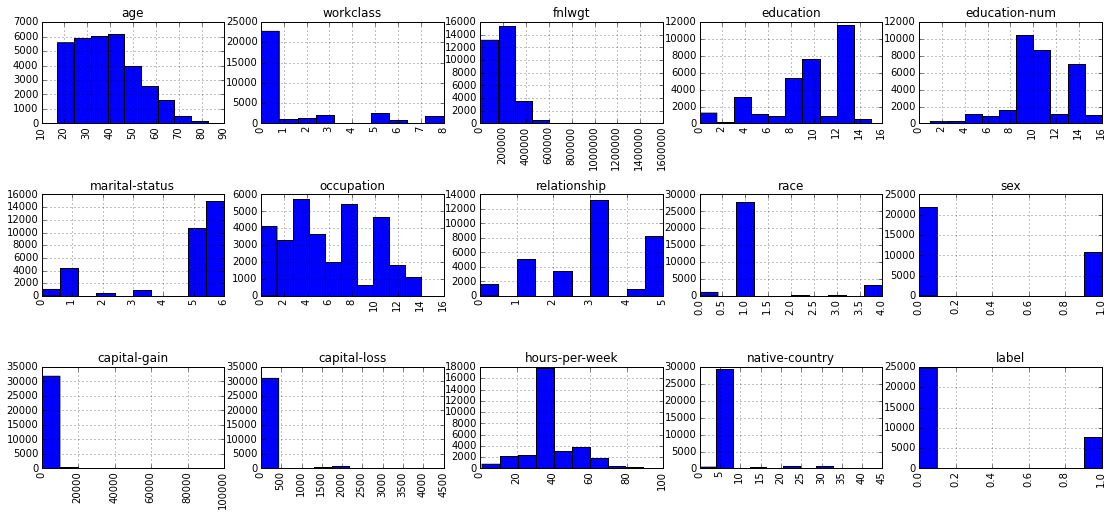

In [18]:
fig = plt.figure(figsize=(19,8))
cols = 5
rows = ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [ ]:
# Do a visialisation of one by one numerical feature 

## Decision tree (CART)
You could use this doc to implement (and hopefully understand) CART: ftp://public.dhe.ibm.com/software/analytics/spss/support/Stats/Docs/Statistics/Algorithms/13.0/TREE-CART.pdf

In [ ]:
def gini(left, right):
    #Implement here Gini criterion
    return 0

def twoing(left, right):
    #Implement here Twoing criterion
    return 0

# Also you could implement ordered Twoing criterion,
# there is at least one acceptable feature for it

In [ ]:
class CART(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, leaf_min_size, tree_depth, criterion='gini'):
        self.leaf_min_size = leaf_min_size
        self.tree_depth = tree_depth
        self.tree = None
    
    def fit(self, X_train, y_train):
        """
        1. Find each predictor’s best split. 
        For each continuous and ordinal predictor, sort its values from the smallest to the largest.
        For the sorted predictor, go through each value from top to examine each candidate split
        point (call it v, if x ≤ v, the case goes to the left child node, otherwise, goes to the right.)
        to determine the best. The best split point is the one that maximize the splitting criterion
        the most when the node is split according to it. The definition of splitting criterion is in
        later section.
        For each nominal predictor, examine each possible subset of categories (call it A, if
        x ∈ A, the case goes to the left child node, otherwise, goes to the right.) to find the best
        split.
        2. Find the node’s best split.
        Among the best splits found in step 1, choose the one that maximizes the splitting
        criterion.
        3. Split the node using its best split found in step 2 if the stopping rules are not satisfied. 
        
        Write your growing tree code here. You should use stopping_criterion while growing it.
        """
        self.X_train = X_train
        self.y_train = y_train

        return self
    
    def stopping_criterion(node, current_tree_depth):
        """
        There are a few stopping criteria. You should implement them here.
        
        • If a node becomes pure; that is, all cases in a node have identical values of the dependent
        variable, the node will not be split.
        • If all cases in a node have identical values for each predictor, the node will not be split.
        • If the current tree depth reaches the user-specified maximum tree depth limit value, the
        tree growing process will stop.
        • If the size of a node is less than the user-specified minimum node size value, the node
        will not be split.
        • If the split of a node results in a child node whose node size is less than the userspecified
        minimum child node size value, the node will not be split. 
        • If for the best split, the improvement is smaller than the user-specified minimum improvement, 
        the node will not be split. 
        
        Some sources call some of the criteria (e.g. tree depth) a pre-pruning, so you could check sources 
        about it before implementation.
        """
        return False
    
    def impurity(left, right):
        if criterion == 'gini':
            return gini(left, right)
        elif criterion == 'twoing':
            return twoing(left, right)
        else:
            #You could insert here call for ordered Twoing
            raise ValueError("Unknown criterion type!")
            
    def predict(self, X_test):
        """
        Predict labels for test data using this classifier. Take the tree growned in the fit stage.
        Don't forget to handle missing values: the label you choose should be from the sub-tree 
        which has less enthropy.

        Inputs:
        - X_test: A numpy array of shape (num_test, D) containing test data consisting
                  of num_test samples each of dimension D.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
             test data, where y[i] is the predicted label for the test point X[i].
        """
        y_pred = numpy.zeros(X_test.shape[0])
        return y_pred

In [ ]:
cart = CART(10,20)
cart = cart.fit(X_train, Y_train)
%time y_pred = cart.predict(X_train[:100])

### Optional part: Pruning
More information you could get here: http://www.dcc.fc.up.pt/~ltorgo/PhD/th4.pdf

In [ ]:
def pruning(cart_tree, alpha):
    '''
    CART prunes a large regression tree T using a two-stage
    algorithm called Error-Complexity pruning. This method is
    based on a measure of a tree called error-complexity EC(T, α), 
    which is defined as,
    
    EC (T, α) = Err(T) + α * #T
    
    where,
    
    Err(T) is the error rate for the tree T;
    #T is a number of leaves of tree T;
    and α is the complexity parameter.
    
    EC should decrease for each node in a tree replaced by leaf. So you go through 
    all the nodes and trying to replace them, and checking with EC as it defined above.
    
    Some sources refer to this as post-pruning.
    '''
    pruned_tree = cart_tree
    return pruned_tree

cart = CART(10,20)
pruned = pruning(cart, 0.1)

## Tree visualisation

In [ ]:
# Create a picture of your tree, using GraphViz

value = """strict digraph G {
1 [label="hi\\nhi", shape="box"];
2;
3[label="hi\\nhi"];
4;
5;
1 -> 2;
1 -> 3;
1 -> 5  [weight="0.5", color="red"];
2 -> 4;
}
"""

open('tree.dot', 'w').write(value)

In [ ]:
!dot -Tpng tree.dot -o tree.png
Image('tree.png')

## Tree comparison visualisation

In [4]:
# 1) Сгенерируйте 3 двумерных двухклассовых выборки
# 2) Обучите на нах классификаторы: Ваше деврево, kNN
# 3) С постоянным шагом по каждой координате проведите классфикацию точек плоскости
# 4) Какой классфикатор работает лучше, в чем преимущества и недостатки Решаюших деревьев и KNN для этих выборок?

    
# --------
#1) Используйте KNN -- http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#2) Для генерации выборки используйте from sklearn.datasets import make_moons, make_circles
#3) Пример решения http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

# Example:
from IPython.display import Image
from IPython.display import display
display(Image(url="http://scikit-learn.org/stable/_images/plot_classifier_comparison_001.png"))

## Tree bagging
The training algorithm for random forests applies the general technique of bootstrap aggregating, or bagging, to tree learners. Given a training set $X=x_1,...,x_n$ with responses $Y = y_1, ..., y_n$, bagging repeatedly ($ B $ times) selects a random sample with replacement of the training set and fits trees to these samples.
After training, predictions for unseen samples $ x' $ can be made by averaging the predictions from all the individual regression trees on $x'$:

$$ \hat{f} = \frac{1}{B} \sum_{b=1}^B \hat{f}_b (x') $$

or by taking the majority vote in the case of decision trees.

This bootstrapping procedure leads to better model performance because it decreases the variance of the model, without increasing the bias. This means that while the predictions of a single tree are highly sensitive to noise in its training set, the average of many trees is not, as long as the trees are not correlated. Simply training many trees on a single training set would give strongly correlated trees (or even the same tree many times, if the training algorithm is deterministic); bootstrap sampling is a way of de-correlating the trees by showing them different training sets.

In [ ]:
def bagging(X, y, size):
    #Implement random sampling here
    sample_X, sample_y = X[:size], y[:size]
    return sample_X, sample_y

In [ ]:
class Forest(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees):
        self.num_trees = num_trees
        self.trees = []
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging.
        '''
        return self
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        y_pred = numpy.zeros(X_test.shape[0])
        return y_pred

In [ ]:
forest = Forest(10)
forest = forest.fit(X_train, Y_train)
%time y_pred = cart.predict(X_train[:100])

## Code F1 score and Cross Validation Process
You could use sklearn functions instead.

In [ ]:
# F1

def f1(y_true, y_predict):
    score = 0
    return score

In [ ]:
# Cross validation

def cross_validation(X, y, metric, cv_fold=5):
    scores = []
    # Put your code hear
    return np.mean(scores)

In [ ]:
#You could try to vary parameters of a tree or of a forest, or may be do something more clever with forest itself.